# Phase 4 Project
This project will train a model to identify patients with pneumonia based off their chest x-rays. The process will be done entirely in python utilizing the Tensorflow library. Conveniently the data is already split into test and train folders in labeled folders (normal or pneumonia) by the dataset providers. Since the data was already sorted, the next step was to load the images into python using Tensorflow's preprocessing image library. We imported the `ImageDataGenerator` class which allowed us to easily import each test and train folder as their own individual generators with some commonly used parameters to normalize all the imported images on import. We didn't have to specify the class labels for this because the generator can recognize the labels by the two folders inside the test or train folder with 'normal' or 'pneumonia' labels. The file structure looks like this: 
```
data/
    train/
        normal/
        pneumonia/
    test/
        normal/
        pneumonia/
```
Once the generator was created we loaded the images with the test or train path into their separate flows. This was all the preperation the data needed in order to start being used to train the model. The next step was to create a model using layers we thought would do the trick which can then be further tuned in sequential runs of the model to retrain it. Once the parameters for the model were set, we trained the model on the training data. The model turned out to be *average* with definite room for improvement by tweaking the model parameters further and possibly separating out a third data set for validation purposes that can be fed to the model during training. The importance of a third data set for validation purposes is so the final test data has never been seen by us or the model to remove any sort of bias. The model's accuracy score was `0.7644230723381042` which can definitely be improved. The model was validated by running against the test data to provide an accuracy score from the model.

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer
from matplotlib import pyplot as plt
import numpy as np

In [5]:
train_dir = '../data/chest_xray/train'
test_dir = '../data/chest_xray/test'

Creating the ImageDataGenerators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

Creating the data generators

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Double checking the class labels were identified correctly

In [12]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Creating the model

In [9]:
model = Sequential([
    InputLayer(input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,850,497 (182.54 MB)

 Trainable params: 47,850,497 (182.54 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Fitting the model

In [14]:
model.fit(train_generator,epochs=10)

Epoch 1/10


/opt/miniconda3/envs/mac_tf/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7685 - loss: 1.0465
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8882 - loss: 0.2575
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9096 - loss: 0.2216
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9044 - loss: 0.2269
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9174 - loss: 0.2031
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9304 - loss: 0.1742
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.9246 - loss: 0.1900
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.9224 - loss: 0.1959
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9390 - loss: 0.1553
Epoch 10/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9441 - loss: 0.1414


Model Evaluation

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(test_acc)

/opt/miniconda3/envs/mac_tf/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.5525 - loss: 1.1074
0.7644230723381042


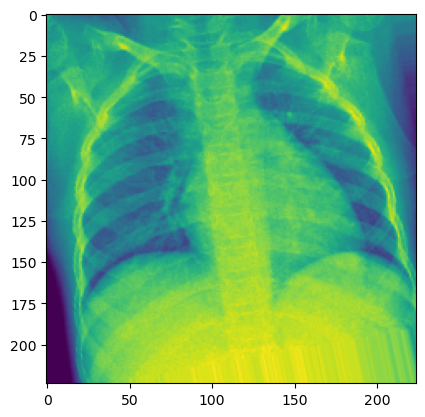

In [64]:
img, _ = next(train_generator)
plt.imshow(img[0]);

Testing on a image from the test data individually to see the prediction value

In [58]:
test_yes_image_path = '../data/chest_xray/test/PNEUMONIA/BACTERIA-227418-0001.jpeg'
test_no_image_path = '../data/chest_xray/test/NORMAL/NORMAL-6518197-0001.jpeg'
test_yes_image = load_img(test_yes_image_path, target_size=(224, 224),color_mode='grayscale')
test_no_image = load_img(test_no_image_path, target_size=(224, 224),color_mode='grayscale')

In [59]:
img_array = img_to_array(test_yes_image)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [60]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.9995884]]
